# COMPUTER ASSIGNMENT 1


<br>

- In class we learned about different color representations. 
- **HSL** (Hue, Saturation, Lightness) and **HSV** (Hue, Saturation, Value) are two alternative representations of the RGB color model. Hue represents dominant color as perceived by an observer and can be used for simple color detection. Take the following steps:
 1. **[ TODO 1 ]** Load a color image of your choice (if you wish you can choose an image from the sample images provided at the course website as a colored image. You can refer to tutorial 3_Opencv.ipynb for loading a color image.
 - **[ TODO 2 ]** Use **cv2.cvtColor()** function to convert the BGR image to HSV. As an input to this function you should use **cv2.COLOR_BGR2HSV**.
 - **[ TODO 3 ]** Use **cv2.inRange()** function to find the pixels in the HSV image that has value in the range of blue color. Your result should be a binary mask.  The lower and upper limits for the blue color are **[110,50,50]** and **[130,255,255]**, respectively. 
 - **[ TODO 4 ]** Use **cv2.bitwise_and()** function to create an image containing only the blue parts.
 - **[ TODO 5 ]** Display the original image and the mask and the detected blue parts. Furthermore, save the resulting images.  For displaying and saving images you can refer to tutorial 3_Opencv.ipynb

Your results should look something like the following. 
![](./Figures/Figure_1.png)



## PART 1


- Write the code to load the image here

In [52]:
# TODO - 1
import cv2
import matplotlib.pyplot as plt
import numpy as np

imgBGR = cv2.imread('colors.jpg')


- Print the size of the image loaded 

In [43]:
print(type(imgBGR))  
print(imgBGR.shape)

<class 'numpy.ndarray'>
(300, 450, 3)


- Convert color from BGR to HSV

In [53]:
# TODO - 2
imgHSV = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2HSV)

- Code for finding the mask for blue color pixels

In [50]:
# TODO - 3
img2 = cv2.inRange(imgHSV, np.array([110,50,50]),np.array([130,255,255]))


- Code for extraction of blue parts (Use the bitwise AND)


In [51]:
# TODO - 4
imgBlue = cv2.bitwise_and(imgBGR,imgBGR, mask= img2)



- Code to **display results**. If using matplotlib.pyplot to display image, convert to RGB for correct color display.
- Code to **save resulting images** 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


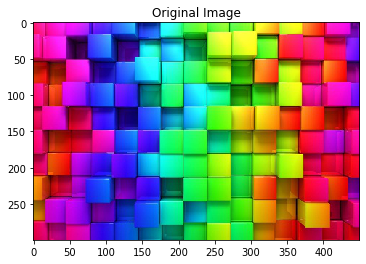

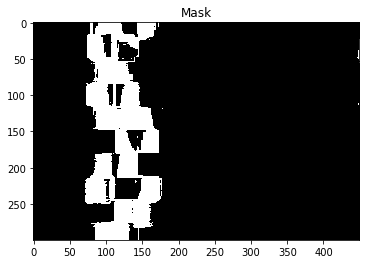

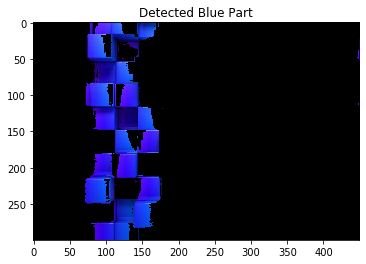

In [54]:
# TODO - 5

imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)   #converts color space from BGR to RGB
I1=plt.figure()
plt.imshow(imgRGB)
plt.title('Original Image')
I1.savefig('Original.png')

I2=plt.figure()
print(img2)
plt.imshow(img2,cmap='gray')
plt.title('Mask')
I2.savefig('Mask.png')

imgRGB_Blue = cv2.cvtColor(imgBlue,cv2.COLOR_BGR2RGB)
I3=plt.figure()
plt.imshow(imgRGB_Blue)
plt.title('Detected Blue Part')
I3.savefig('BlueExtracted.png')



## PART 2

### Histogram Operations
- In this exercise we will explore the histogram equalization of gray-scale images. 
   
 - You can also find useful sample codes in the following link from OpenCV tutorials- [TUTORIALS](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html )

- Take the following steps:
 1. **[ TODO 6 ]** Load the **wiki.jpg** image from sample images as a gray-scale image using **cv2.imread()** function. Note: set the second argument of cv2.imread() function to **0** for gray-scale.
 - **[ TODO 7 ]** Calculate the histogram of the image. **np.histogram()** function can be used for calculation of the histogram. Refer to following link for more information:[HISTOGRAMS](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram.html) 
 - **[ TODO 8 ]** Calculate the cdf using the **np.cumsum()** function and proper normalization.
 - **[ TODO 9 ]** Compute and apply the histogram equalizing function using the algorithm described in class.
 - **[ TODO 10 ]** Display the results.
 
Expected Output:
![](./Figures/Figure_2.png)


- Code to read the image

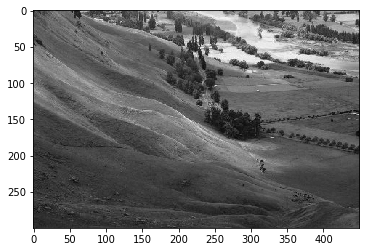

In [37]:
# TODO - 6
img_wiki = cv2.imread('wiki.jpg',0)
plt.imshow(img_wiki,cmap= 'gray')

- Find the Histogram

In [30]:
# TODO - 7
hist,bins = np.histogram(img_wiki.flatten(),256,[0,256]) 

- Calculate the CDF


In [31]:
# TODO - 8
cdf = hist.cumsum()
cdf_normalized = cdf * 255/ cdf[-1]

- Apply Histogram Equilization

In [32]:
# TODO - 9
img_histeq = cdf_normalized[img_wiki] 

- **Display results** and **save image**
- When displaying images using plt.imshow(), use the parameters vmin=0, vmax=255
- This is because plt.imshow() automatically scale the colormap to fit the range of the image, setting vmin and vmax will prevent this

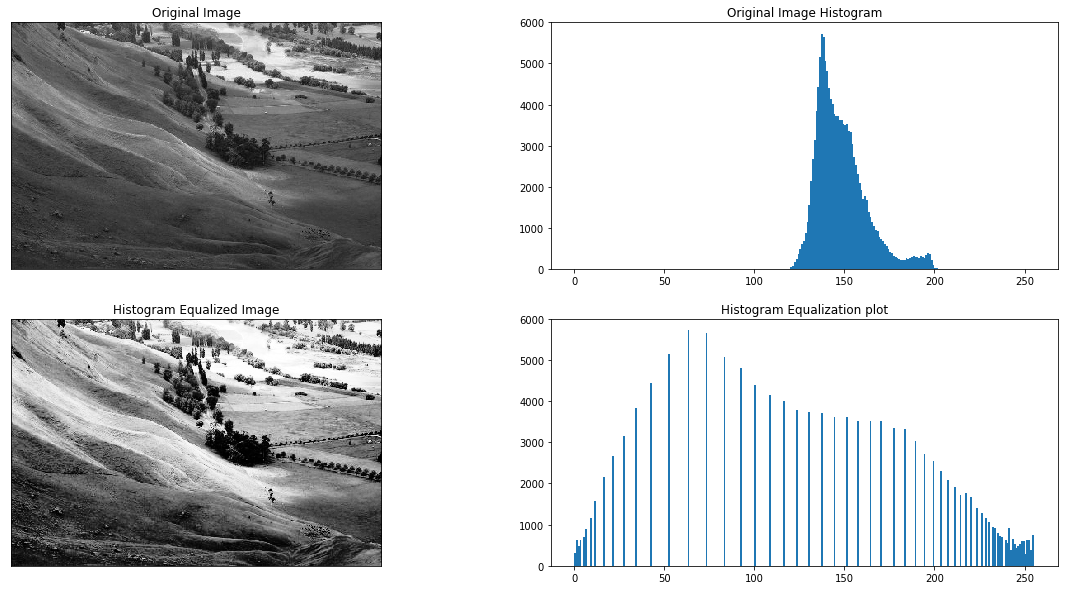

In [42]:
# TODO - 10
Orig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(2,2,1)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.imshow(img_wiki, cmap=plt.cm.gray)
plt.title('Original Image')

Orig_plot = plt.subplot(2,2,2)
plt.hist(img_wiki.ravel(),256,[0,256])
plt.title('Original Image Histogram')

ax3 = plt.subplot(2,2,3)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
plt.imshow(img_histeq,cmap=plt.cm.gray)
plt.title('Histogram Equalized Image')

ax4 = plt.subplot(2,2,4)
plt.hist(img_histeq.ravel(),256,[0,256])
plt.title('Histogram Equalization plot')
plt.show()


Orig.savefig('Histogram_Equalization.png')